# <font color="#971318">Análise da Imigração no Canadá</font> 
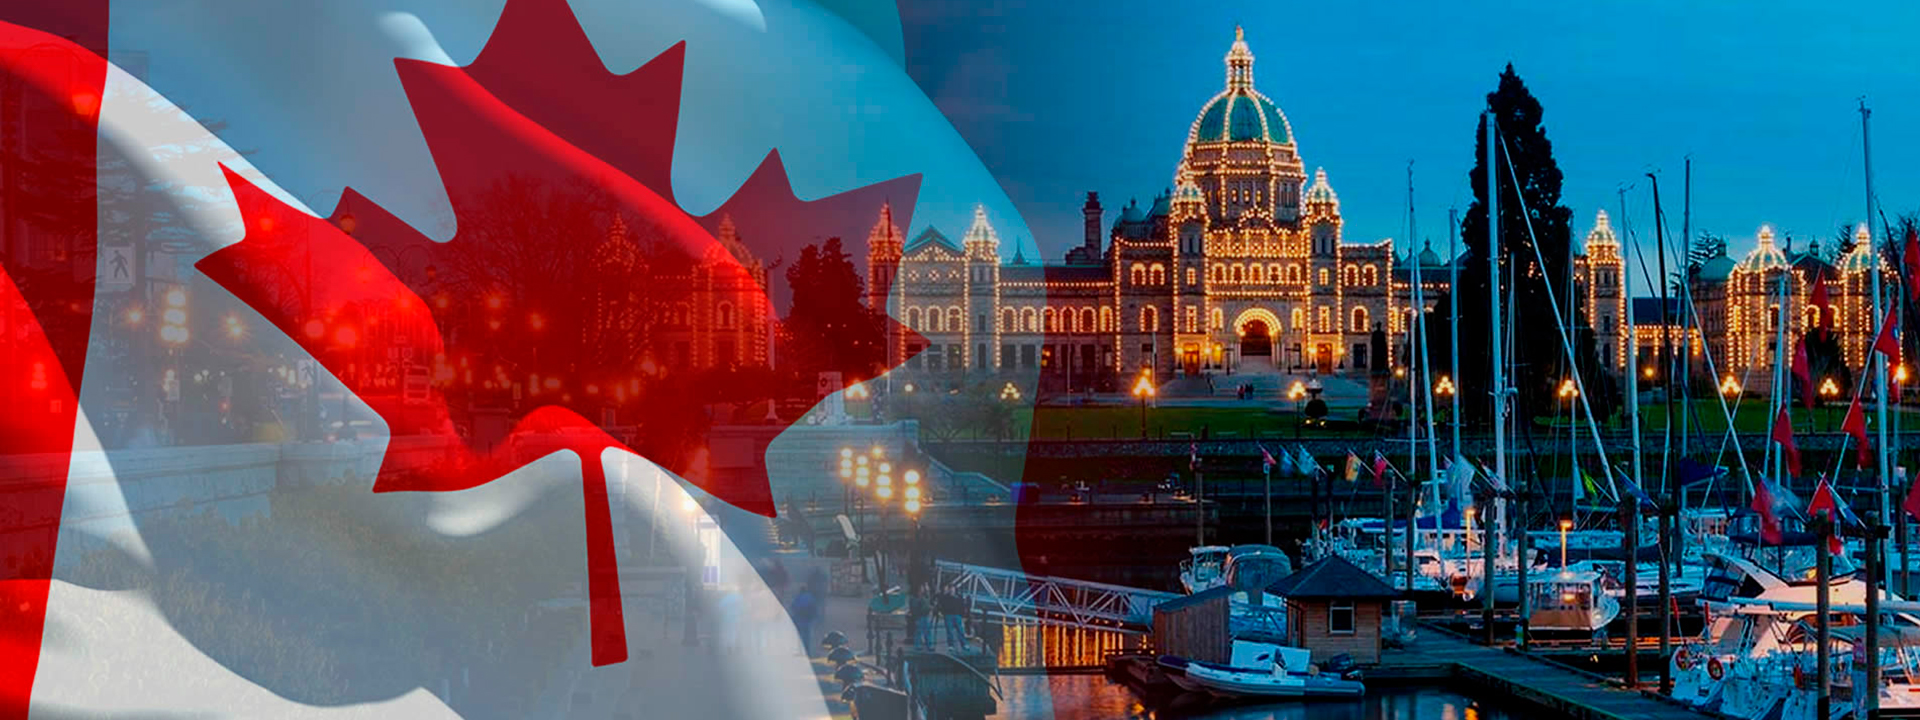


# <font color="#FC010B">Contexto</font>

Exploraremos nesta análise de dados o comportamento da imigração no Canadá entre os anos de 1980 a 2013. Neste dataset, tentaremos visualizar diferentes aspectos dos imigrantes que visitam o Canadá, tentei realizar visualizações mais eficazes e interativas a fim de  responder algumas perguntas intrigantes. Para tornar nossas visualizações mais interativas, estaremos utilizando a maioria de nossos gráficos com Plotly, uma biblioteca interativa que nos permitirá ter um melhor insight sobre nossos dados.

##  <font color="#ff0000" id="section_1"> Leitura dos Dados</font>

In [415]:
#Importando as bibliotecas    
import numpy as np  
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')


In [416]:
#Importando a base de dados
df = pd.read_excel('Imigracao Canada Analise\Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )



In [417]:
#Exibindo 5 linhas do dataframe
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color="#ff0000" id="section_1"> Preparação dos Dados</font>

In [418]:
#Removendo as colunas desnecessárias

df.drop(['Unnamed: 44','Unnamed: 43', 'Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50'], axis = 1, inplace=True)

In [419]:
#Exibindo informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

### <font color="#800000" id="section_1"> Verificando se há dados ausentes</font>

In [420]:
#Checando se o dataframe possui dados faltantes
df.isna().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

Como podemos observar, esse dataset não possui dados ausentes. 

Farei algumas modificações no conjunto de dados original para facilitar a criação de nossas visualizações.

 #### <font color="#800000" id="section_1"> Irei remover novamente algumas colunas do conjunto de dados que não são informativas para visualização (eg. Type, AREA, REG)</font>

In [421]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [422]:
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [423]:
#Renomeando algumas colunas para melhor entendimento 
df.rename(columns={'OdName':'Pais', 'AreaName':'Continente','RegName':'Regiao'}, inplace=True)

In [424]:
df.head()

,Pais,Continente,Regiao,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Observe como os nomes das colunas agora fazem muito mais sentido e facilitam a leitura do dataset

In [425]:
#Examinando os labels das colunas
all(isinstance(column, str) for column in df.columns)

False

Observe como a linha de código acima retornou False quando testamos se todos os labels das colunas são do tipo string. Então, vamos alterá-los todos para string.

In [426]:
df.columns = list(map(str, df.columns))

# Verificando os tipos de labels das colunas
all(isinstance(column, str) for column in df.columns)

True

####  <font color="#800000" id="section_1"> Definindo o nome do país como índice para pesquisar pelos países de maneira mais fácil pelo método .loc</font>

In [427]:
df.set_index('Pais', inplace=True)

In [428]:
#Agora a coluna Pais passou a ser o índice do dataframe
df.head()

,Continente,Regiao,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Observe como os nomes dos países agora servem como índices, isso irá facilitar muito a realização da análise exploratória

In [429]:
#Criando uma coluna Total que irá conter a soma de todos os anos
df['Total'] = df.sum(axis=1)

In [430]:
df.head()

,Continente,Regiao,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


A partir de agora o dataframe possui uma coluna extra que apresenta o número total de imigrantes de cada país no conjunto de dados de 1980 a 2013. Então, se imprimirmos a dimensão dos dados, obtemos:

In [431]:
#Agora nosso dataframe passou a ter 38 colunas.
print ('Dimensões dos Dados:', df.shape)

Dimensões dos Dados: (195, 38)


In [432]:
#Criando uma lista dos anos de 1980 a 2013, isso será útil quando começarmos a plotar os dados
anos = list(map(str, range(1980, 2014)))

anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# <font color="#ff0000" id="section_1"> Análise Exploratória & Visualização dos Dados</font>

In [482]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Obtendo as 5 primeiras linhas
df_top5 = df.head()

# Transpondo o dataframe
df_top5 = df_top5[anos].transpose() 

df_top5.head()

Pais,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


##  <font color="#ff0000" id="section_1"> Gráficos de Área</font>

As plotagens dos gráficos de área são empilhadas por padrão. E para produzir um gráfico de área empilhada, cada coluna deve ter todos valores positivos ou todos negativos (qualquer valor NaN será padronizado como 0). Para produzir um gráfico não empilhado, passe o argumento stacked = False.

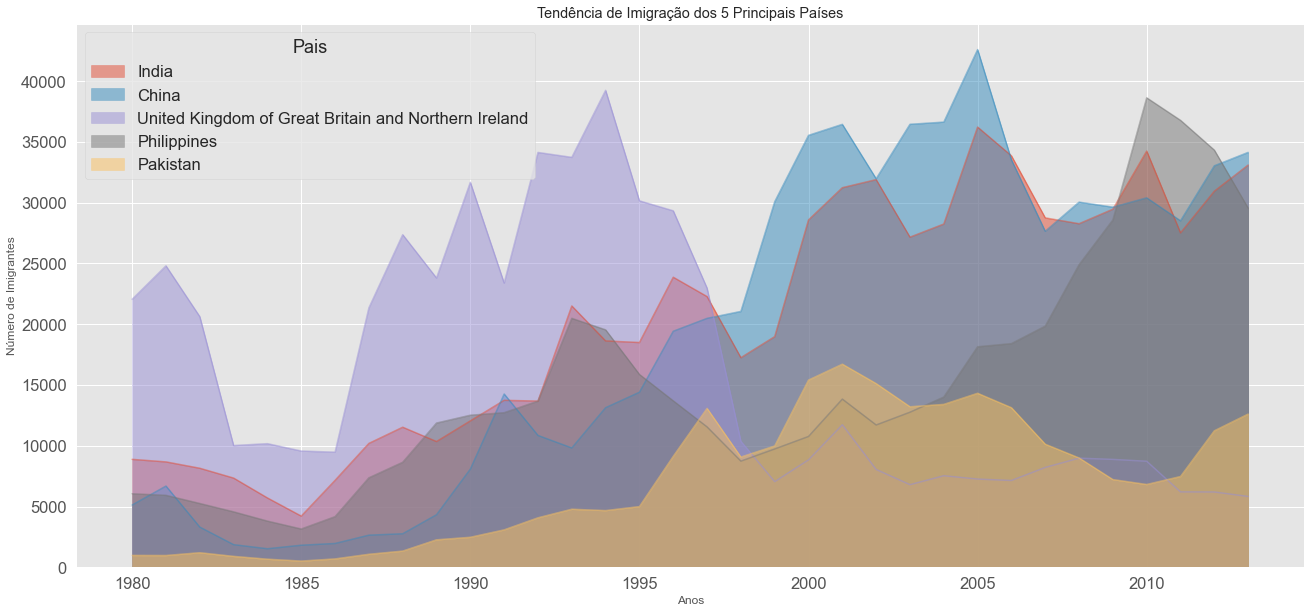

In [434]:
df_top5.index = df_top5.index.map(int) # Mudando o valores do indice do df_top5 p/ o tipo int para realizar a plotagem
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(22, 10)  # Alterando o tamnho da imagem
             )

plt.title('Tendência de Imigração dos 5 Principais Países')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

O gráfico não empilhado tem uma transparência padrão (valor alfa) de 0,5. Podemos modificar esse valor passando o parâmetro alfa.

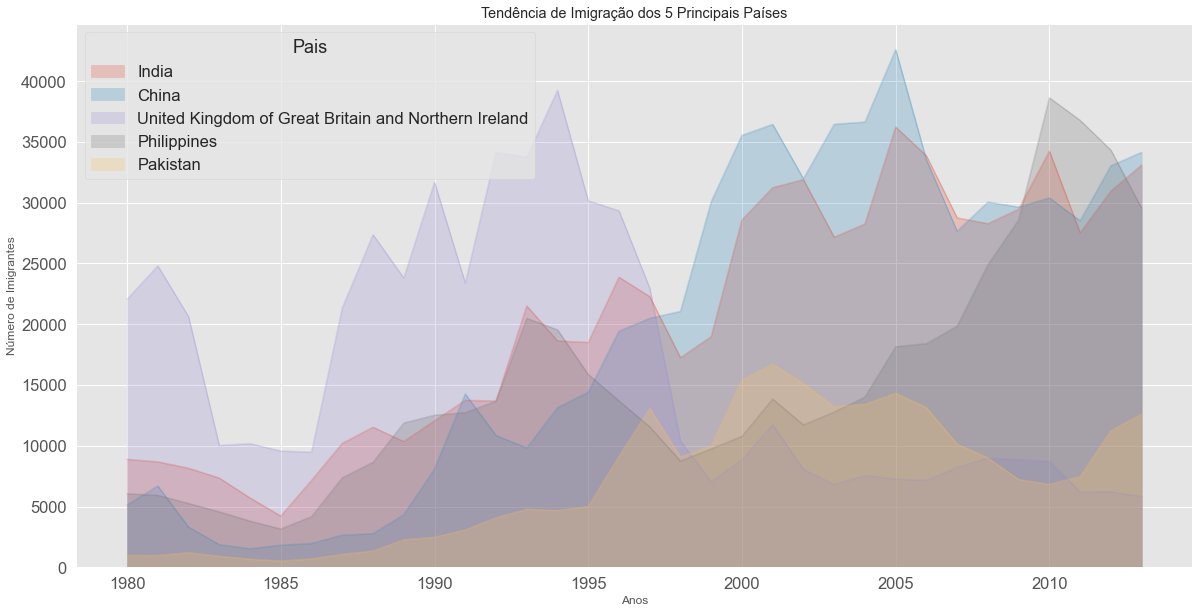

In [435]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, Valor padrão  a= 0.5
             stacked=False, #A plotagem não será empilhada
             figsize=(20, 10),
            )

plt.title('Tendência de Imigração dos 5 Principais Países')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

In [436]:
#Gráfico de área com plotly
fig = px.area(df_top5, title='Tendência de Imigração dos 5 Principais Países', 
             
             labels={
                 'index':'Anos',
                 'value':'Número de Imigrantes',
                 'Pais': 'Países'
               }
             
             
             )

#Renomeando os nomes das legendas
newnames = {'United Kingdom of Great Britain and Northern Ireland':'Reino Unido','India':'Índia','China':'China','Philippines':'Filipinas','Pakistan':'Paquistão'}

fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.update_yaxes(showticklabels=False)
fig.show()

##   <font color="#ff0000" id="section_1"> Tipos de Plotagems</font>

  * **Opção 1: Script Layer (método procedural) - usando matplotlib.pyplot como 'plt'**

Podemos usar plt, ou seja, matplotlib.pyplot e adicionar mais elementos chamando diferentes métodos proceduralmente; por exemplo, plt.title (...) para adicionar título ou plt.xlabel (...) para adicionar rótulo ao eixo x.

```python
# Opção 1: esse é o tipo de plotagem que usei até agora
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) #plotagem empilhada
plt.title('Tendência de Imigração dos 5 Principais Países')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()
``` 

* **Opção 2: Artist Layer (Método Orientado a Objetos) - usando uma instância de `Axes` do Matplotlib (preferencial)**

Podemos usar uma instância `Axes` do nosso gráfico atual e armazená-lo em uma variável (por exemplo,` ax`). É possível adicionar mais elementos chamando métodos com uma pequena mudança na sintaxe (adicionando "* set_ *" aos métodos anteriores). Por exemplo, use `ax.set_title ()` ao invés de `plt.title ()` para adicionar título, ou `ax.set_xlabel ()` ao invés de `plt.xlabel ()` para adicionar rótulo ao eixo x.

Esta segunda opção às vezes é mais transparente e flexível para usar em plotagens avançadas (em particular quando há plotagens múltiplas).

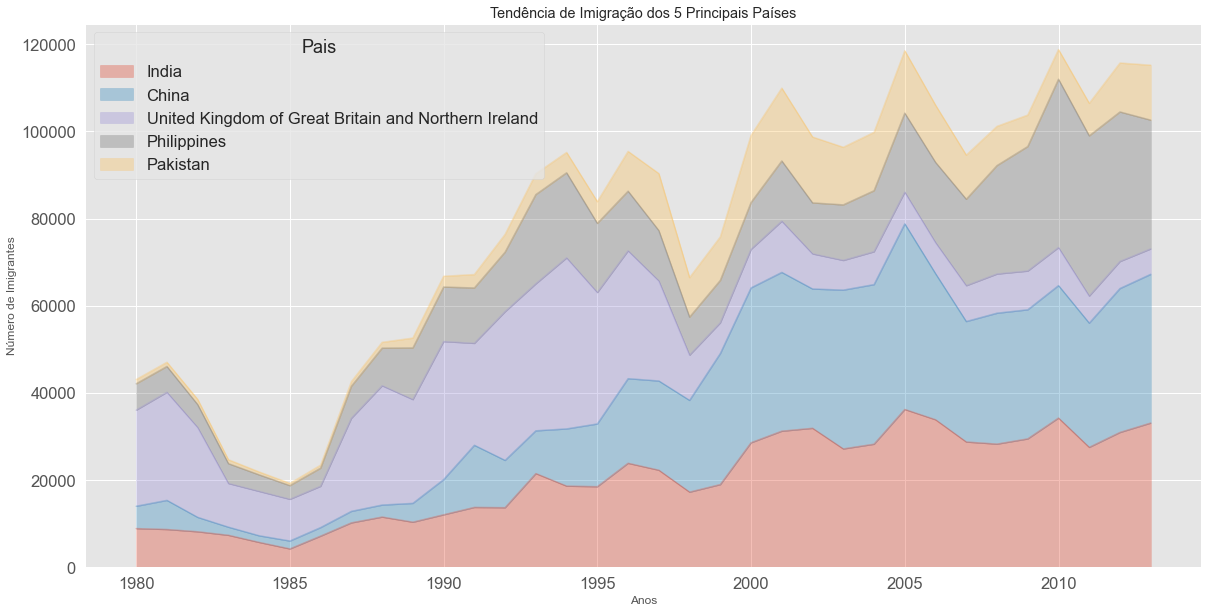

In [437]:
# Opção 2: opção preferida com mais flexibilidade
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Tendência de Imigração dos 5 Principais Países')
ax.set_ylabel('Número de Imigrantes')
ax.set_xlabel('Anos')
plt.show()

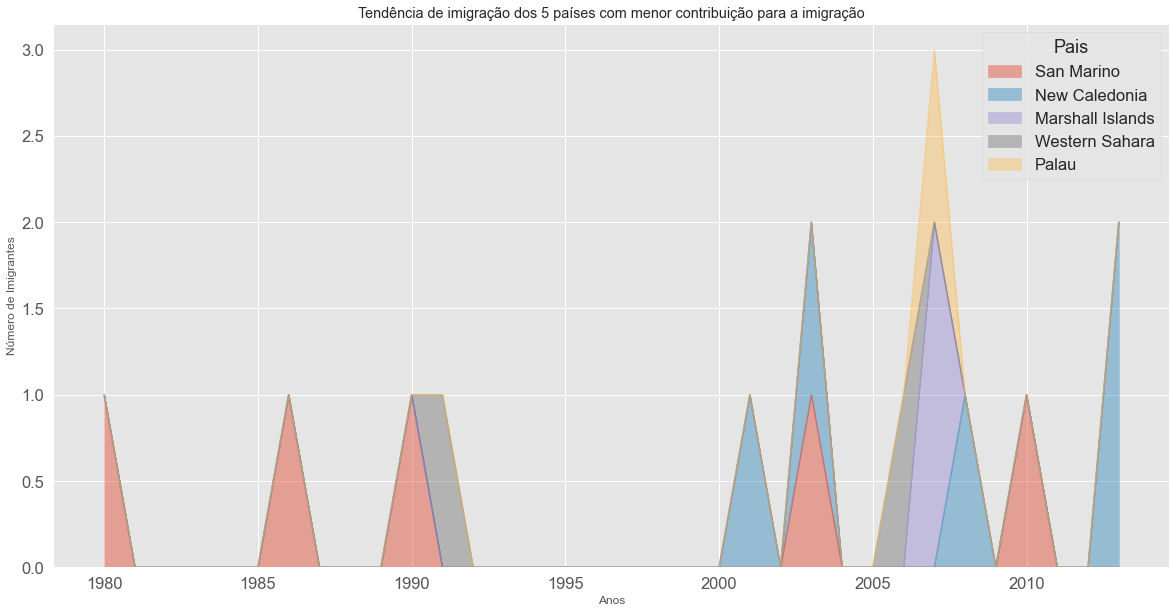

In [438]:
df_last5 = df.tail(5)
df_last5 = df_last5[anos].transpose()
df_last5.index = df_last5.index.map(int)

df_last5.plot(kind='area', alpha=0.45, figsize=(20,10))
plt.title('Tendência de imigração dos 5 países com menor contribuição para a imigração')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

In [439]:
#Gráfico Interativo com Plotly
fig = px.area(df_last5, title='Tendência de imigração dos 5 países com menor contribuição para a imigração', 
             
             labels={
                 'index':'Anos',
                 'value':'Número de Imigrantes',
                 'Pais': 'Países'
               }
      
        
             )
fig.show()

##    <font color="#ff0000" id="section_1"> Histogramas </font>

Um histograma é uma forma de representar a distribuição de frequência de um conjunto de dados numéricos. Basicamente particionamos o eixo x em compartimentos, e atribuimos cada ponto de dados em nosso conjunto de dados a um compartimento e, em seguida, contamos o número de pontos de dados que foram atribuídos a cada compartimento. Portanto, o eixo y é a frequência ou o número de pontos de dados em cada compartimento. Observe que podemos alterar o tamanho do compartimento e geralmente é necessário ajustá-lo para que a distribuição seja exibida bem.

**Questão:** Qual é a distribuição de frequência do número (população) dos novos imigrantes de vários países para o Canadá em 2013?

Antes de criarmos o  gráfico de histograma, vamos primeiro examinar a divisão dos dados em intervalos. Para fazer isso, usaremos o método de histrograma Numpy para obter os intervalos de bin e contagens de frequência.

In [440]:
#Exibindo os dados do ano 2013
df['2013'].head()

Pais
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [441]:
#np.histogram retorna 2 valores
count, bin_edges = np.histogram(df['2013'])

print(count) # contagem de frequência
print(bin_edges) # bin ranges, padrão = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Por padrão, o método de histrograma divide o conjunto de dados em 10 compartimentos. A figura abaixo resume as faixas de bin e a distribuição de frequência da imigração em 2013. Podemos ver que em 2013:

* 178 países contribuíram com 0 a 3412,9 imigrantes
* 11 países contribuíram com 3412,9 a 6825,8 imigrantes
* 1 país contribuiu com 6285,8 a 10238,7 imigrantes e assim por diante.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>

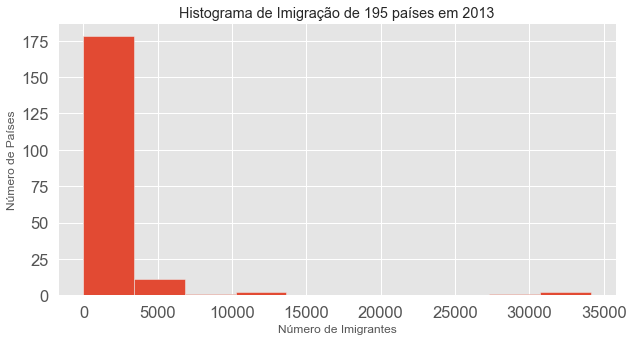

In [442]:
#Histograma simples 
df['2013'].plot(kind='hist', figsize=(10, 5))

plt.title('Histograma de Imigração de 195 países em 2013') 
plt.ylabel('Número de Países') 
plt.xlabel('Número de Imigrantes') 

plt.show()

No gráfico acima, o eixo x representa a faixa da população de imigrantes em intervalos de 3412,9. O eixo y representa o número de países que contribuíram para a população mencionada.

Podemos perceber que os rótulos do eixo x não correspondem ao tamanho do compartimento. Isso pode ser corrigido passando uma palavra-chave xticks que contém a lista de tamanhos bin.

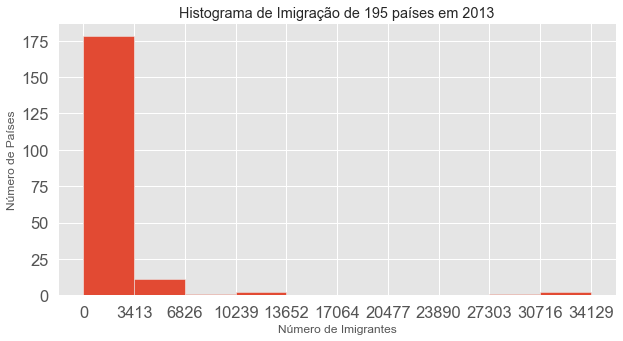

In [443]:
# bin_edges 'é uma lista de intervalos bin
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(10, 5), xticks=bin_edges)

plt.title('Histograma de Imigração de 195 países em 2013') 
plt.ylabel('Número de Países') 
plt.xlabel('Número de Imigrantes') 

plt.show()

In [444]:
#Histograma com plotly
fig = px.histogram(df['2013'], title='Histograma de Imigração de 195 países em 2013',
                  
               labels={
                 
                'variable':'Ano',
                 'value': 'Número de Imigrantes'
               
               }    
                  
                  )


fig.show()

 **Questão**: Qual é a distribuição da imigração para a Dinamarca, Noruega e Suécia nos anos de 1980 a 2013?

In [445]:
#Filtrando o conjunto de dados para recuperar apenas os valores correspondentes a esses países
df.loc[['Denmark', 'Norway', 'Sweden'], anos]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [446]:
#Transpondo o dataframe
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], anos].transpose()
df_t.head()

Pais,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


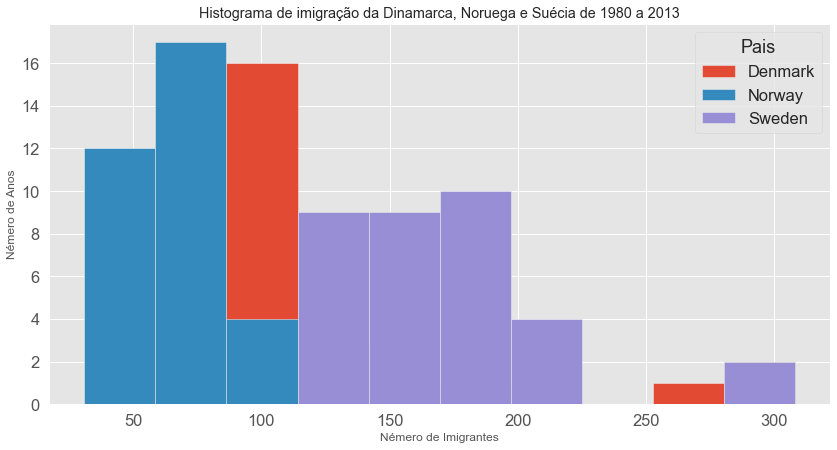

In [447]:
df_t.plot(kind='hist', figsize=(14, 7))

plt.title('Histograma de imigração da Dinamarca, Noruega e Suécia de 1980 a 2013')
plt.ylabel('Némero de Anos')
plt.xlabel('Némero de Imigrantes')

plt.show()

Vamos fazer algumas modificações para melhorar o impacto e a estética do gráfico anterior:

* aumentar o tamanho da caixa para 15 passando o parâmetro `bins`
* definir a transparência para 60% passando o parâmetro `alpha`
* rotular o eixo x passando o parâmetro `x-label`
* mudar as cores dos gráficos passando o parâmetro `color`

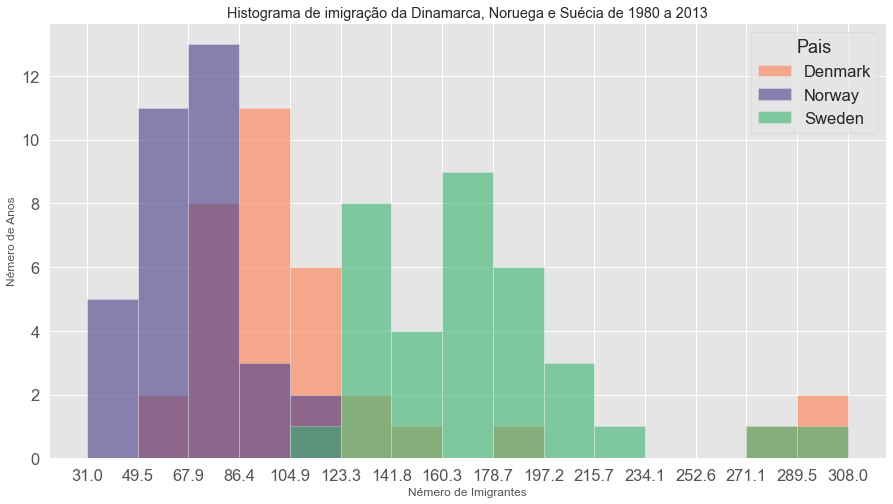

In [448]:
count, bin_edges = np.histogram(df_t, 15)

# histograma não empilhado
df_t.plot(kind ='hist', 
          figsize=(15, 8),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histograma de imigração da Dinamarca, Noruega e Suécia de 1980 a 2013')
plt.ylabel('Némero de Anos')
plt.xlabel('Némero de Imigrantes')

plt.show()

Se não quisermos que os gráficos se sobreponham, podemos empilhá-los usando o parâmetro `stacked`. Ajustaremos os rótulos mínimo e máximo do eixo x para remover a lacuna extra nas bordas do gráfico. Podemos passar uma tupla (min, max) usando o parâmetro `xlim`, conforme mostrado abaixo.

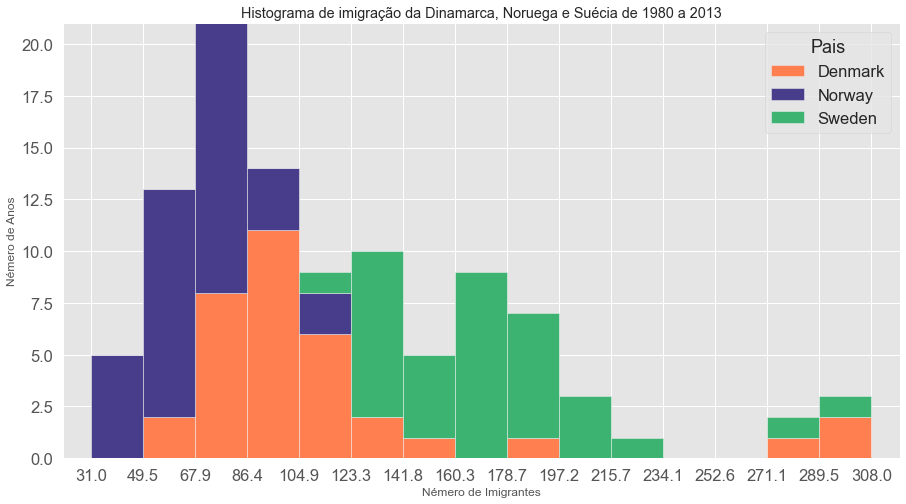

In [449]:
count, bin_edges = np.histogram(df_t, 15)

xmin = bin_edges[0] - 10   #  o valor do primeiro bin é 31,0, adicionando buffer de 10 para fins estéticos
xmax = bin_edges[-1] + 10  #  o último valor bin é 308,0, adicionando buffer de 10 para fins estéticos

# Histograma empilhado
df_t.plot(kind='hist',
          figsize=(15, 8), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histograma de imigração da Dinamarca, Noruega e Suécia de 1980 a 2013')
plt.ylabel('Némero de Anos')
plt.xlabel('Némero de Imigrantes') 

plt.show()

In [450]:
#Histograma p/ uma visualização mais detalhada 
fig = px.histogram(df_t, title='Histograma de Imigração da Dinamarca, Noruega e Suécia de 1980 a 2013',
                  
               labels={
                 'Pais':'País',
                 'value': 'Número de Imigrantes'
                 
               }    
                  
                  )


fig.show()

Podemos notar que quando utilizamos o histograma no Plotly Express ele já vem empilhado por default e não precisamos passar o comando `stacked`. A vantagem desse tipo de gráfico é que podemos interagir com ele e acessar todos os valores de forma livre e mais flexível.

 **Questão**: Qual é a distribuição da imigração para o Brasil nos anos de 1980 a 2013?

In [451]:
df.loc[['Brazil'], anos]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Brazil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714


In [452]:
brasil = df.loc[['Brazil'], anos].transpose()
brasil.head()

Pais,Brazil
1980,211
1981,220
1982,192
1983,139
1984,145


In [453]:
fig = px.histogram(brasil, title='Histograma de Imigração do Brasil de 1980 a 2013',
                  
               labels={
                 'Pais':'País',
                 'value': 'Número de Imigrantes'
                 
               }    
                  
                  )


fig.show()

**Questão**: Qual é a distribuição de imigração para Grécia, Albânia e Bulgária nos anos 1980-2013?

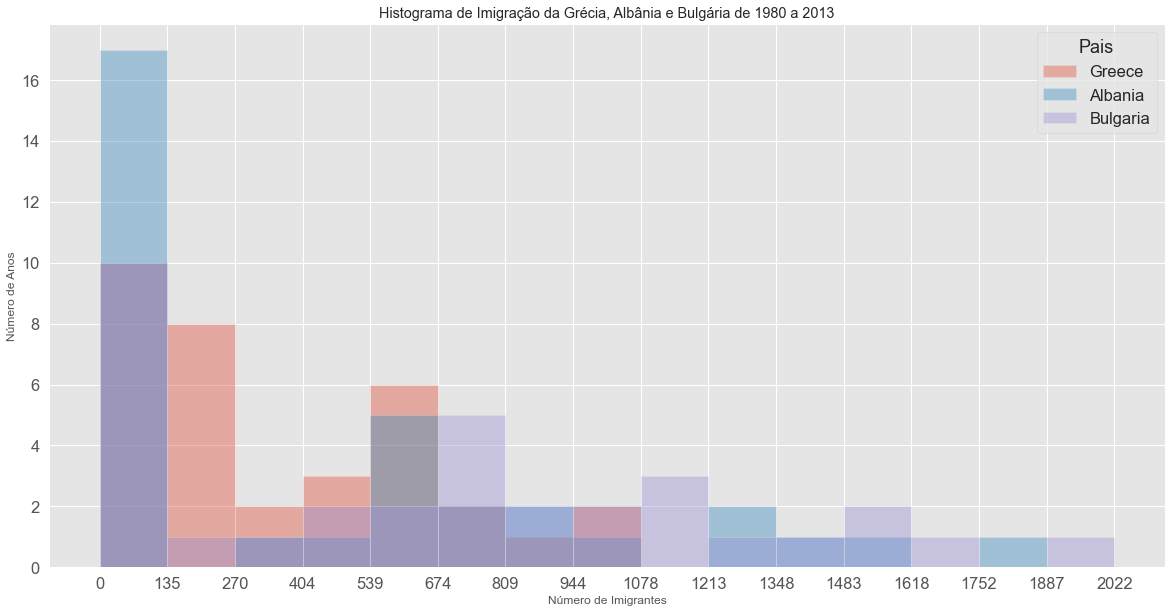

In [454]:
df_paises = df.loc[['Greece','Albania','Bulgaria'], anos].transpose()

count, bin_edges = np.histogram(df_paises, 15)

df_paises.plot(kind='hist',
           stacked=False,
           figsize=(20, 10),
           bins=15,
           alpha=0.39,
           xticks=bin_edges)

plt.title('Histograma de Imigração da Grécia, Albânia e Bulgária de 1980 a 2013')
plt.ylabel('Número de Anos')
plt.xlabel('Número de Imigrantes')

plt.show()

Gráfico sobreposto com 15 bins e um valor de transparência de 0,39.

##  <font color="#ff0000" id="section_1"> Gráficos de Barras </font>

Um gráfico de barras é uma forma de representar os dados onde o *comprimento* das barras representa a magnitude / tamanho do recurso / variável. Os gráficos de barras geralmente representam variáveis ​​numéricas e categóricas agrupadas em intervalos.

**Questão**: Qual o número total de imigrantes no Canadá dos 15 principais países, para o período de 1980 a 2013 ?

In [455]:
#Obtendo o número total de imigrantes dos 15 paises 
df.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df['Total'].tail(15)
df_top15

Pais
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

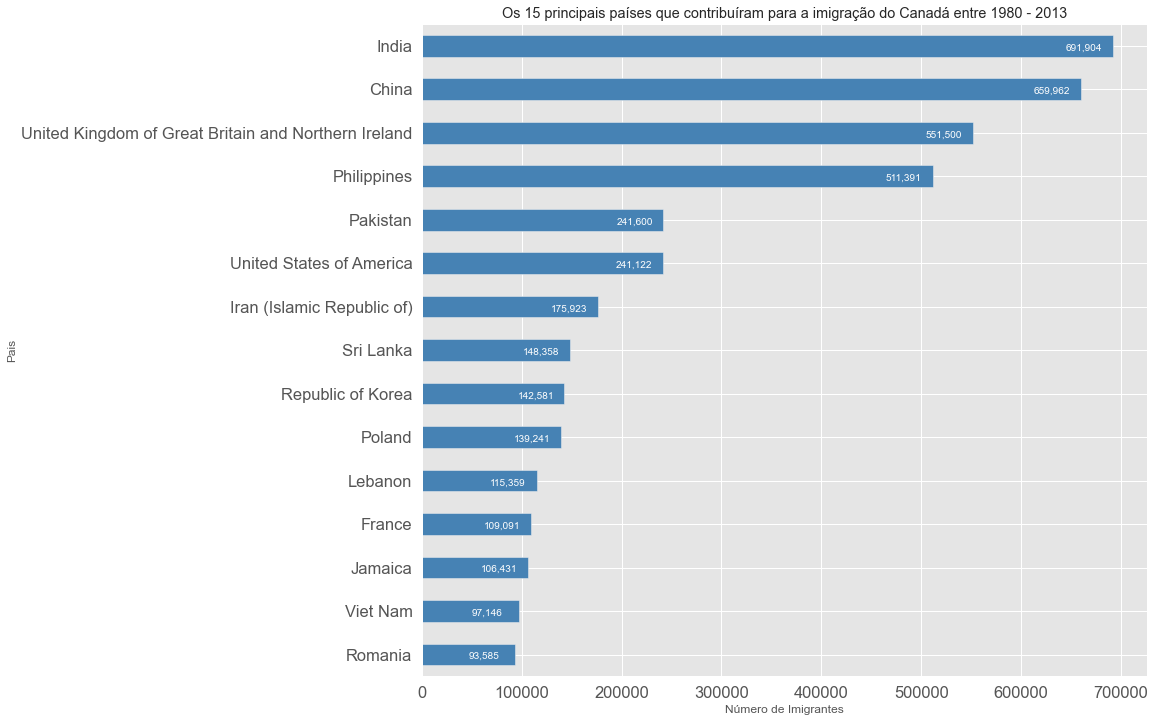

In [456]:
df_top15.plot(kind='barh', figsize=(13, 12), color='steelblue')
plt.xlabel('Número de Imigrantes')
plt.title('Os 15 principais países que contribuíram para a imigração do Canadá entre 1980 - 2013')

 # anotar os valores dos labels para cada país
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # formatar com virgula
    
    # coloque o texto no final da barra (subtraindo 47000 de xe 0,1 de y para fazê-lo caber na barra)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()


In [457]:
#Plotando com Plotly Express

fig = px.bar(df_top15,  orientation='h',text='value',title= 'Top 15 Países que contribuiram para a Imigração do Canadá entre 1980 - 2013',
              height= 600, 
              labels={
                 'variable':'Legenda',
                 'Pais': 'Países',
                 'value': 'Total de Imigrantes'
              }
            
            )
 
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside') #Adicionando valor total em cada barra
fig.update_traces(marker_color='#B3367A') #Alterando a cor do gráfco         
fig.show()

##  <font color="#ff0000" id="section_1"> Gráficos de Linhas </font>

In [458]:
brasil = df.loc['Brazil', anos] # passando em anos 1980 - 2013 para excluir a coluna 'total'
brasil.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brazil, dtype: object

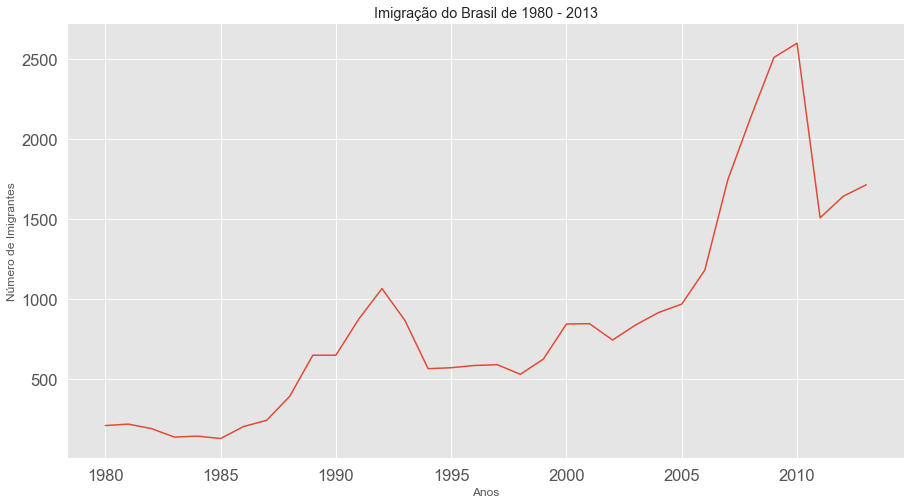

In [459]:
brasil.index = brasil.index.map(int) #vamos mudar os valores do índice do Brasil para o tipo int para plotagem
brasil.plot(kind='line', figsize=(15, 8))

plt.title('Imigração do Brasil de 1980 - 2013')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

In [460]:
#Gráfico de linhas interativo com Plotly
fig = px.line(brasil, title='Imigração do Brasil de 1980 a 2013',
                  
               labels={
                 'variable':'Brazil',
                 'value': 'Número de Imigrantes',
                 'index': 'Anos'
               }    
                  
                  )


fig.show()

**Questão**: Qual o número total de imigrantes da China e da Índia para o período de 1980 a 2013 ?

In [461]:
df_1 = df.loc[['India','China'], anos]
df_1.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [462]:
#Transpondo os dados
df_1 = df_1.transpose()
df_1.head()

Pais,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


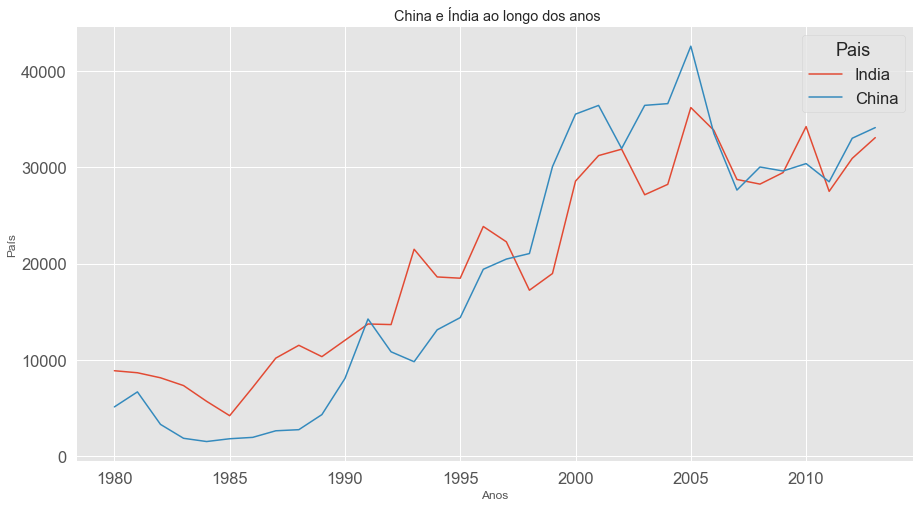

In [463]:
#Gráfico de linhas mostrando os valores de imigrção de Índia e China
df_1.index=df_1.index.map(int)
df_1.plot(kind='line',  figsize=(15, 8))

plt.title(' China e Índia ao longo dos anos')
plt.xlabel('Anos')
plt.ylabel('País')
plt.show()

In [464]:
fig = px.line(df_1, title='Imigração dos países China e Índia ao longo dos anos',
                  
               labels={
                 'Pais':'Países',
                 'value': 'Número de Imigrantes',
                 'index': 'Anos'
               }    
                  
                  )


fig.show()

In [465]:
df_2 = df.sort_values(by='Total', ascending=False).head(5)
df_2 = df_2[anos].transpose()
df_2.index = df_2.index.map(int)

fig = px.line(df_2, title='Tendências de imigração dos 5 principais países',
                  
               labels={
                 'Pais':'Países',
                 'value': 'Número de Imigrantes',
                 'index': 'Anos'
               }    
                  
                  )

newnames = {'United Kingdom of Great Britain and Northern Ireland':'Reino Unido','India':'Índia','China':'China','Philippines':'Filipinas','Pakistan':'Paquistão'}

fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )



fig.show()

Nesse gráfico é exibido a tendência de imigração entre os cindo príncipais países, entretando, como os gráficos do Plotly são interativos, é possível filtrar quais países estarão visíveis no gráfico ou não apenas clicando no nome do país que você deseja desabilitar, assim ficará visível apenas os gráficos que você determinar, desse modo a visualização ficará mais dinâmica e interativa.

##   <font color="#ff0000" id="section_1"> Gráfico de Regressão  </font>



In [466]:
#método sum () para obter a população total por ano
df_tot = pd.DataFrame(df[anos].sum(axis=0))

#alterando os anos para o tipo float (útil para regressão mais tarde)
df_tot.index = map(float, df_tot.index)

#redefinindo o índice para colocá-lo de volta como uma coluna no dataframe df_tot
df_tot.reset_index(inplace=True)

#renomeando as colunas
df_tot.columns = ['ano', 'total']

df_tot.head()

,ano,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


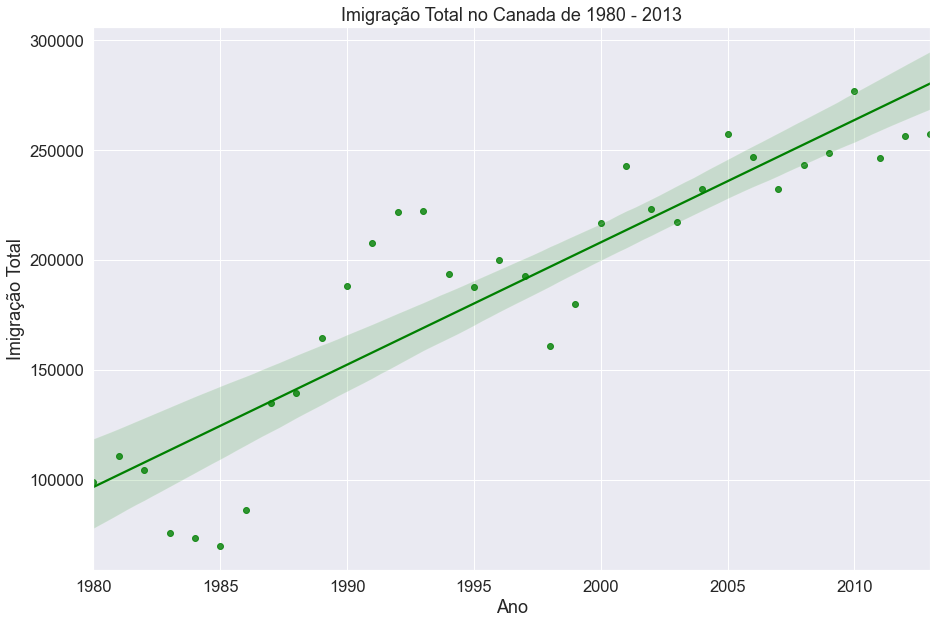

In [467]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)

ax = sns.regplot(x='ano', y='total', data=df_tot, color='green')

ax.set(xlabel='Ano', ylabel='Imigração Total') 
ax.set_title('Imigração Total no Canada de 1980 - 2013')

plt.show()

##    <font color="#ff0000" id="section_1"> Box Splots  </font>

Um `box plot` é uma forma de representar estatisticamente a *distribuição* dos dados por meio de cinco dimensões principais:

- **Mínimo:** Menor número no conjunto de dados.
- **Primeiro quartil:** Número médio entre o `mínimo` e a` mediana`.
- **Segundo quartil (Mediana):** Número do meio do conjunto de dados (classificado).
- **Terceiro quartil:** Número médio entre `mediana` e o ` máximo`.
- **Máximo:** Número mais alto no conjunto de dados.

In [468]:
df_japao = df.loc[['Japan'], anos].transpose()
df_japao.head()

Pais,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


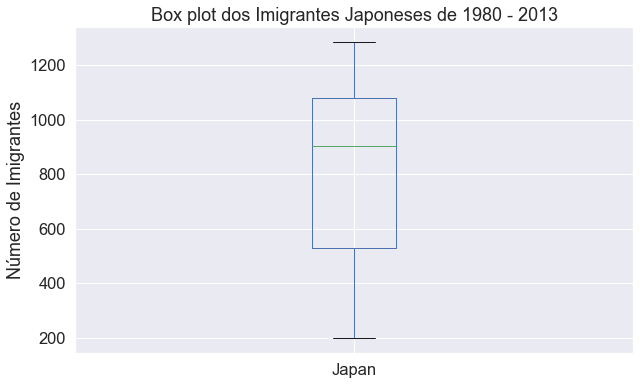

In [469]:
#Box plot simpres
df_japao.plot(kind='box', figsize=(10, 6))

plt.title('Box plot dos Imigrantes Japoneses de 1980 - 2013')
plt.ylabel('Número de Imigrantes')

plt.show()

In [470]:
#Box plot dos países China e Índia
fig = px.box(df_1, title='Box plot dos Imigrantes Chineses e Indianos entre 1980 - 2013',
                  
               labels={
                 'Pais':'Países',
                 'value': 'Número de Imigrantes',
                 'index': 'Anos'
               }    
                  
                  )


fig.show()

Ao passar o mouse sobre esse box plot gerado pelo Plotly, é possível ver os valores exatos do valor mínimo, máximo e de cada um dos quartis de cada país.

Desse modo, podemos fazer imediatamente algumas observações importantes a partir do gráfico acima:

1. O número mínimo de imigrantes na Índia é de cerca de 4211 (min), o número máximo é de cerca de 36.21k (máximo) e o número médio de imigrantes é de cerca de 20.235k (mediana).
2. O número mínimo de imigrantes na China é de cerca de 1527 (min), o número máximo é de cerca de 42.584k (máximo) e o número médio de imigrantes é de cerca de 19.945k (mediana).
3. 25% dos anos para o período de 1980 a 2013 teve uma contagem anual de imigrantes na Índia  de ~ 10.343 ou menos (primeiro quartil).
4. 75% dos anos para o período de 1980 a 2013 teve uma contagem anual de imigrantes na Índia  de ~ 28.742 ou menos (terceiro quartil).
5. 25% dos anos para o período de 1980 a 2013 teve uma contagem anual de imigrantes na China de ~ 5123 ou menos (primeiro quartil).
4. 75% dos anos para o período de 1980 a 2013 teve uma contagem anual de imigrantes na China  de ~ 31.961 ou menos (terceiro quartil).

In [471]:
#Podemos ver os números reais chamando o método describe ()
df_1.describe()

Pais,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


In [472]:
df_top15=df.sort_values(['Total'], ascending=False,axis=0).head(15)
df_top15

,Continente,Regiao,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [473]:
anos_80 = list(map(str,range(1980,1990)))
anos_90 = list(map(str,range(1990,2000)))
anos_2000 = list(map(str,range(2000,2010)))

df_80 = df.loc[:,anos_80].sum(axis=1)
df_90 = df.loc[:,anos_90].sum(axis=1)
df_2000 = df.loc[:,anos_2000].sum(axis=1)

novo_df = pd.DataFrame({'1980s': df_80, '1990s': df_90, '2000s': df_2000})
novo_df

,1980s,1990s,2000s
Pais,,,
Palau,0,0,1
Western Sahara,0,1,1
Marshall Islands,0,0,2
New Caledonia,0,0,3
San Marino,2,1,1
...,...,...,...
Pakistan,10591,65302,127598
Philippines,60764,138482,172904
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413


In [474]:
fig = px.box(novo_df, title='Número da imigração ao longo das décadas de 1980 a 2000',
                  
               labels={
                
                 'value': 'Número de Imigrantes',
                 'variable': 'Décadas'
               }    
                  
                  )


fig.show()


Note como o gráfico de caixa (Box Plot) difere da tabela de resumo criada. O gráfico de caixa examina os dados e identifica os outliers. Para ser um outlier, o valor dos dados deve ser:

* maior que Q3 em pelo menos 1,5 vezes o intervalo interquartil (IQR), ou,
* menor que Q1 em pelo menos 1,5 vezes o IQR.

Vejamos a década de 2000 como um exemplo:

* Q1 (25%) = 250 <br>
* Q3 (75%) = 8,078.5 <br>
* IQR = Q3 - Q1 = 241,922 <br>

Usando a definição de outlier, qualquer valor que seja maior que Q3 em 1,5 vezes IQR será sinalizado como outlier.


Outlier > 8,078.5 + (1.5 * 241,922) <br>
Outlier > 340.385

In [475]:
novo_df[novo_df['2000s']>= 340385]

,1980s,1990s,2000s
Pais,,,
China,32003,161528,340385


##  <font color="#ff0000" id="section_1"> Gráfico de Bolhas  </font>

Um `gráfico de bolhas` é uma variação do` gráfico de dispersão` que exibe três dimensões de dados (x, y, z). Os pontos de dados são substituídos por bolhas, e o tamanho da bolha é determinado pela terceira variável 'z', também conhecida como peso. No `maplotlib`, podemos passar um array ou escalar para a palavra-chave` s` para `plot ()`, que contém o peso de cada ponto.

**Problema:** Vamos começar analisando o efeito da grande depressão na Argentina

A Argentina sofreu uma grande depressão de 1998 a 2002, que causou desemprego generalizado, motins, a queda do governo e um calote da dívida externa do país. Em termos de renda, mais de 50% dos argentinos eram pobres e sete em cada dez crianças argentinas eram pobres no auge da crise de 2002.

Nesse contexto, irei analisar o efeito dessa crise e comparar a imigração argentina com a do vizinho, o Brasil. Vamos fazer isso usando um `gráfico de bolhas` da imigração do Brasil e da Argentina para os anos de 1980 a 2013. Definiremos os pesos da bolha como o valor *normalizado* da população para cada ano.

In [476]:
df_can_t = df[anos].transpose() #dataframe transposto

#fazer o cast dos anos para o tipo int
df_can_t.index = map(int, df_can_t.index)

#rotulando o índice. Este será automaticamente o nome da coluna quando reiniciarmos o índice
df_can_t.index.name = 'Ano'

#redefindo o índice para trazer o ano como uma coluna
df_can_t.reset_index(inplace=True)


df_can_t.head()

Pais,Ano,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [477]:
# normalizar os dados do Brasil
normaliza_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())


# normalizar os dados da Argentina
normaliza_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

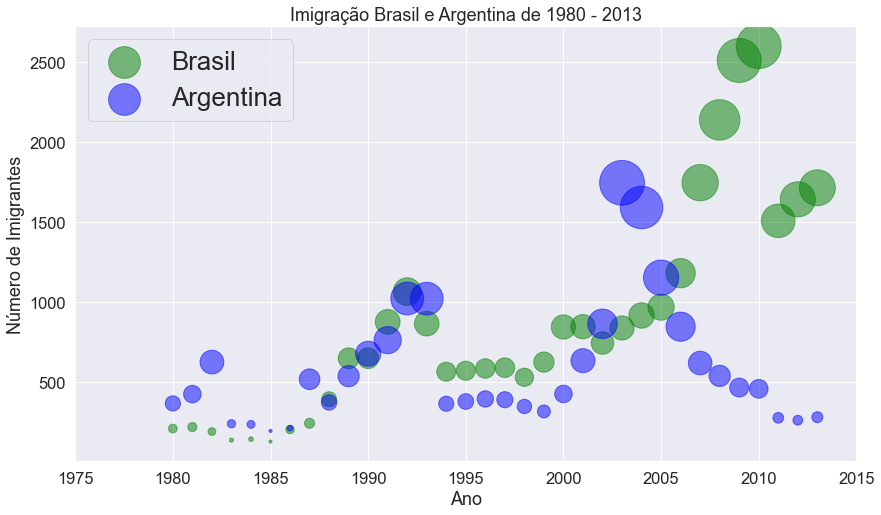

In [479]:
# Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Ano',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparencia
                    color='green',
                    s=normaliza_brazil * 2000 + 10,  

                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Ano',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=normaliza_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Número de Imigrantes')
ax0.set_title('Imigração Brasil e Argentina de 1980 - 2013')
ax0.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')
plt.show()

O tamanho da bolha corresponde à magnitude da população imigrante naquele ano em comparação com os dados de 1980 a 2013. Quanto maior a bolha, mais imigrantes naquele ano.

A partir dos dados do gráfico acima, podemos notar um aumento correspondente na imigração da Argentina durante a grande depressão de 1998-2002. Também podemos observar um pico semelhante por volta de 1985 a 1993. Na verdade, a Argentina sofreu uma grande depressão de 1974 a 1990, pouco antes do início da grande depressão de 1998 a 2002.

De modo similar, o Brasil sofreu o  Efeito Samba , onde o real (moeda) brasileiro caiu quase 35% em 1999. Havia o temor de uma crise financeira na América do Sul, já que muitos países sul-americanos eram fortemente dependentes das exportações industriais do Brasil. O governo brasileiro posteriormente adotou um programa de austeridade e a economia se recuperou lentamente ao longo dos anos, culminando em um aumento repentino em 2010. Os dados de imigração vistos no gráfico refletem esses eventos.

In [480]:
fig = px.scatter(df_can_t, x="Ano", y="Argentina",title='Imigração na Argentina de 1980 - 2013',
             size="Argentina", color="Argentina",
                 hover_name="Argentina", log_x=True, size_max=60,
                 
            )



fig.show()

In [481]:
fig = px.scatter(df_can_t, x="Ano", y="Brazil",title='Imigração no Brasil de 1980 - 2013',
             size="Brazil", color="Brazil",
                 hover_name="Brazil", log_x=True, size_max=60,
                 color_continuous_scale=px.colors.sequential.Viridis,  
            )



fig.show()

E por fim, plotamos dois gráficos de bolhas interativos contendo os dados separados do Brasil e da Argentina.